# Assignment 3 Part 1

CS4172 Machine Learning Lab

Name: Abhiroop Mukherjee

Enrolment Number: 510519109

## Task 1
Download Titanic Dataset (https://www.kaggle.com/heptapod/titanic/version/1#) and do initial pre-processing and train a Logistic Regression for the classifier.

In [1]:
import pandas as pd

FILE_PATH = "./../ML_DRIVE/Assign_3/titanic/train_and_test2.csv"

titanic_df = pd.read_csv(FILE_PATH).dropna()

titanic_df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [2]:
titanic_df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [3]:
# all the zero column are not useful (kaggle saying all zero)
# so ignoring them

# also dropping "Passengerid" cause using pandas internal
# 0-index id

titanic_df = titanic_df[
    filter(
        lambda colName: "zero" not in colName, 
        titanic_df.columns
    )
]
titanic_df = titanic_df.drop("Passengerid", axis=1)
titanic_df


,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [4]:

from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    encoder = OneHotEncoder()

    encoded_df = pd.DataFrame(
        encoder.fit_transform(X[[col_name]]).toarray(),
        index=X.index,
        columns=encoder.get_feature_names_out()
    )

    X = X.join(encoded_df)
    X = X.drop(col_name, axis=1)

    return X



In [5]:
# sibsp has value ranging from 0 to 8 (doing OneHotEncoding)
# Parch has value ranging from 0 to 9 (doing OneHotEncoding)
# Pclass has value ranging from 0 to 3 (doing OneHotEncoding)
# Embarked has value ranging from 0 to 3 (doing OneHotEncoding)

columns_to_encode = ["sibsp", "Parch", "Pclass", "Embarked"]

for column in columns_to_encode:
    titanic_df = one_hot_encode(titanic_df, column)

titanic_df

,Age,Fare,Sex,2urvived,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,...,Parch_4,Parch_5,Parch_6,Parch_9,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,22.0,7.2500,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,71.2833,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,53.1000,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1305,39.0,108.9000,1,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1306,38.5,7.2500,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1307,28.0,8.0500,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [6]:
# Age and Fare needs to be standardized
from sklearn.preprocessing import StandardScaler

def standardize(df: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    scaler = StandardScaler()

    df[[col_name]] = pd.DataFrame(
        data=scaler.fit_transform(df[[col_name]]),
        index=df.index,
        columns=[col_name]
    ) 
    return df

    

In [7]:
columns_to_standardize = ['Age', "Fare"]

for column in columns_to_standardize:
    titanic_df = standardize(titanic_df, column)

titanic_df

,Age,Fare,Sex,2urvived,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,...,Parch_4,Parch_5,Parch_6,Parch_9,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,-0.580261,-0.501839,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.662297,0.736023,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.269621,-0.488790,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.429318,0.384512,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.429318,-0.486373,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,-0.114301,-0.486373,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1305,0.739957,1.463211,1,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1306,0.701127,-0.501839,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1307,-0.114301,-0.486373,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [8]:
# Preprocessing Done, lets move to model
X = titanic_df.drop('2urvived', axis=1)
y = titanic_df[['2urvived']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
# make, train, and score the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train.iloc[:,0])
accuracy = model.score(X_test, y_test)
print(f"accuracy = {accuracy}")

accuracy = 0.7675840978593272


## Task 2

Analyze and control the overfitting by varying the inverse of regularization strength parameter (0.1, 0.25,0.5, 0.75, 0.9) and plot the accuracy graph for the test set.

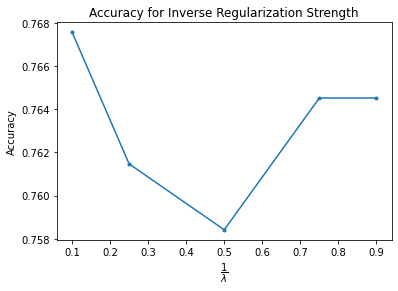

In [11]:
inv_reg_strs = (0.1, 0.25, 0.5, 0.75, 0.9)
accuracies = []

for inv_reg_str in inv_reg_strs:
    model = LogisticRegression(C=inv_reg_str)\
        .fit(X_train, y_train.iloc[:, 0])
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)
 
import matplotlib.pyplot as plt

plt.plot(inv_reg_strs, accuracies, '.-')
plt.title("Accuracy for Inverse Regularization Strength")
plt.xlabel(r"$\dfrac{1}{\lambda}$")
plt.ylabel("Accuracy")
plt.show()


In [12]:
pd.DataFrame(
    data = zip(inv_reg_strs, accuracies),
    columns=['inv_reg_str', 'accuracy']
)


,inv_reg_str,accuracy
0,0.10,0.767584
1,0.25,0.761468
2,0.50,0.758410
3,0.75,0.764526
4,0.90,0.764526


## Task 3
Using the same dataset train a Decision Tree classifier and vary the maximum depth of the tree to train at least 5 classifiers to analyze the effectiveness.

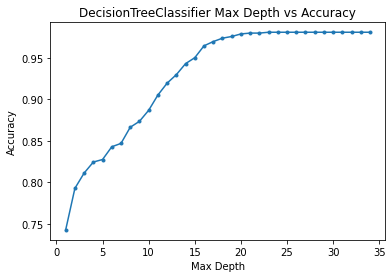

In [13]:
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 35)
accuracies = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)\
        .fit(X_train, y_train)
    accuracy = model.score(X_train, y_train)
    accuracies.append(accuracy)

plt.plot(max_depths, accuracies, ".-")
plt.title("DecisionTreeClassifier Max Depth vs Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

